<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

# 1. Importing Packages

In [120]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import nltk
import re
import string
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
nltk.download('vader_lexicon')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# 2. Loading Data

In [121]:
df_test = pd.read_csv ("test_with_no_labels.csv")
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \r\nPu...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [122]:
df_train = pd.read_csv('train.csv')
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


# 3. Exploratory Data Analysis

In [123]:
df_test.describe()


,tweetid
count,10546.000000
mean,496899.936943
std,288115.677148
min,231.000000
25%,246162.500000
50%,495923.000000
75%,742250.000000
max,999983.000000


In [124]:
df_train.describe()


,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


*Null values*

In [125]:
df_test.isnull().sum()

message    0
tweetid    0
dtype: int64

In [126]:
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [127]:
df_test.shape

(10546, 2)

In [128]:
df_train.shape

(15819, 3)

# 4.Data Cleaning

In [129]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [130]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


**Comments**

- There are no null values from the observations

In [131]:
unique_sentiment = list(df_train["sentiment"].unique())
print(unique_sentiment)

[1, 2, 0, -1]


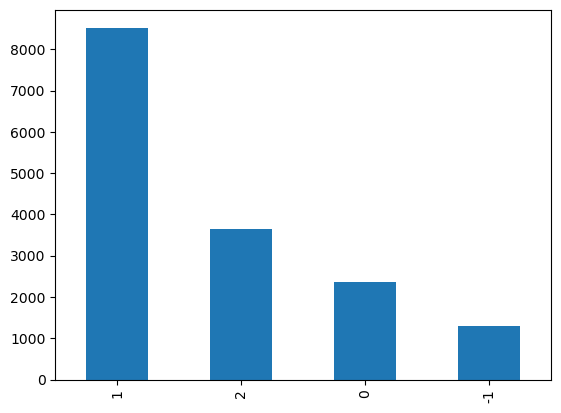

In [132]:
df_train['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

# Removing Noise

#### Removing the web-urls

In [133]:
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
message = df_train['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [134]:
message.head()

0    PolySciMajor EPA chief doesn't think carbon di...
1    It's not like we lack evidence of anthropogeni...
2    RT @RawStory: Researchers say we have three ye...
3    #TodayinMaker# WIRED : 2016 was a pivotal year...
4    RT @SoyNovioDeTodas: It's 2016, and a racist, ...
Name: message, dtype: object

#### Converting every word to lower case

In [135]:
message_lower = message.str.lower()
message_lower.head()

0    polyscimajor epa chief doesn't think carbon di...
1    it's not like we lack evidence of anthropogeni...
2    rt @rawstory: researchers say we have three ye...
3    #todayinmaker# wired : 2016 was a pivotal year...
4    rt @soynoviodetodas: it's 2016, and a racist, ...
Name: message, dtype: object

#### Removing punctuation

In [136]:
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

In [137]:
massages = message_lower.apply(remove_punctuation)
massages.head()

0    polyscimajor epa chief doesnt think carbon dio...
1    its not like we lack evidence of anthropogenic...
2    rt rawstory researchers say we have three year...
3    todayinmaker wired  2016 was a pivotal year in...
4    rt soynoviodetodas its 2016 and a racist sexis...
Name: message, dtype: object

In [144]:
# Replace all other characters with space except letters from a to z
letters = massages.astype(str).apply(lambda x: re.sub("[^a-z]", " ", x))

print(letters)

0        polyscimajor epa chief doesnt think carbon dio...
1        its not like we lack evidence of anthropogenic...
2        rt rawstory researchers say we have three year...
3        todayinmaker wired       was a pivotal year in...
4        rt soynoviodetodas its      and a racist sexis...
                               ...                        
15814    rt ezlusztig they took down the material on gl...
15815    rt washingtonpost how climate change could be ...
15816    notiven rt nytimesworld what does trump actual...
15817    rt sara smiles hey liberals the climate change...
15818    rt chetcannon kurteichenwalds climate change e...
Name: message, Length: 15819, dtype: object


#### Tokenisation

In [146]:
tokeniser = TreebankWordTokenizer()
tokenise = letters.apply(tokeniser.tokenize)
tokenise.head()

0    [polyscimajor, epa, chief, doesnt, think, carb...
1    [its, not, like, we, lack, evidence, of, anthr...
2    [rt, rawstory, researchers, say, we, have, thr...
3    [todayinmaker, wired, was, a, pivotal, year, i...
4    [rt, soynoviodetodas, its, and, a, racist, sex...
Name: message, dtype: object

#### Stemming

In [141]:
stemmer = SnowballStemmer('english')

In [142]:
def mbti_stemmer(words, stemmer):
    return [stemmer.stem(word) for word in words]

In [148]:
df_train['stem'] = tokenise.apply(mbti_stemmer, args=(stemmer, ))
df_train['stem'].head()

0    [polyscimajor, epa, chief, doesnt, think, carb...
1    [it, not, like, we, lack, evid, of, anthropoge...
2    [rt, rawstori, research, say, we, have, three,...
3    [todayinmak, wire, was, a, pivot, year, in, th...
4    [rt, soynoviodetoda, it, and, a, racist, sexis...
Name: stem, dtype: object

#### Lemmatization

In [149]:
lemmatizer = WordNetLemmatizer()

In [150]:
def mbti_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words] 

In [151]:
df_train['lemma'] = df_train['tokens'].apply(mbti_lemma, args=(lemmatizer, ))
df_train['lemma'].head()

0    [polyscimajor, epa, chief, doesnt, think, carb...
1    [it, not, like, we, lack, evidence, of, anthro...
2    [rt, rawstory, researcher, say, we, have, thre...
3    [todayinmaker, wired, wa, a, pivotal, year, in...
4    [rt, soynoviodetodas, it, and, a, racist, sexi...
Name: lemma, dtype: object

### Object Standardization

In [152]:
lookup_dict = {'rt':'Retweet',"sci":"science", 'dm':'direct message', "awsm" : "awesome", "yr" :"year"}

In [153]:
def lookup_words(input_text):
    words = input_text.split() 
    new_words = [] 
    for word in words:
        if word.lower() in lookup_dict:
            word = lookup_dict[word.lower()]
        new_words.append(word) 
        new_text = " ".join(new_words) 
        return new_text

In [154]:

lookup_words(df_train['message'].iloc[2002])

'Retweet'

#### Stop words

In [155]:
from nltk.corpus import stopwords
print(sorted(stopwords.words('english')))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some',

In [156]:
def remove_stop_words(tokens):    
    return [t for t in tokens if t not in stopwords.words('english')]

In [157]:
df_train['stem'] = df_train['tokens'].apply(remove_stop_words)
df_train['stem'].head()

0    [polyscimajor, epa, chief, doesnt, think, carb...
1    [like, lack, evidence, anthropogenic, global, ...
2    [rt, rawstory, researchers, say, three, years,...
3    [todayinmaker, wired, pivotal, year, war, clim...
4    [rt, soynoviodetodas, racist, sexist, climate,...
Name: stem, dtype: object

# Feature extraction from text data

#### Bag of word

In [158]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             ) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(df_train["message"])

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()
train_data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [159]:
print (train_data_features.shape)

(15819, 31905)


#### Comment

* There are 15819 rows and 24819 features for each word

In [160]:
def bag_of_words_count(words, word_dict={}):
    """ this function takes in a list of words and returns a dictionary 
        with each word as a key, and the value represents the number of 
        times that word appeared"""
    for word in words:
        if word in word_dict.keys():
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict

In [161]:
personality = {}
for pp in unique_sentiment:
    df = df_train.groupby('sentiment')
    personality[pp] = {}
    for row in df.get_group(pp)['tokens']:
        personality[pp] = bag_of_words_count(row, personality[pp])       

In [162]:
all_words = set()
for pp in unique_sentiment:
    for word in personality[pp]:
        all_words.add(word)

In [163]:
personality['all'] = {}
for pp in unique_sentiment:    
    for word in all_words:
        if word in personality[pp].keys():
            if word in personality['all']:
                personality['all'][word] += personality[pp][word]
            else:
                personality['all'][word] = personality[pp][word]

In [164]:
total_words = sum([v for v in personality['all'].values()])
total_words

276994

Text(0.5, 0, 'word frequency')

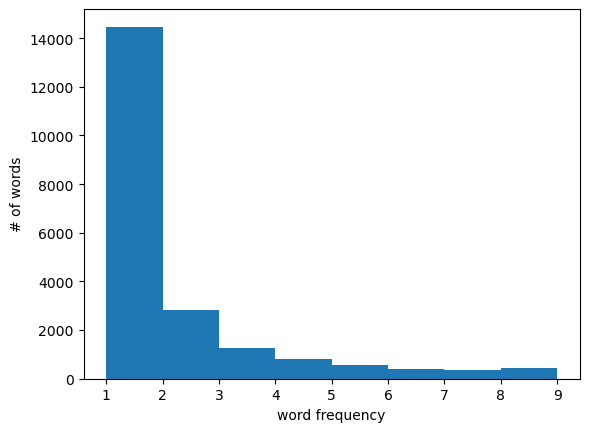

In [165]:
all_words = plt.hist([v for v in personality['all'].values() if v < 10],bins=8)
plt.ylabel("# of words")
plt.xlabel("word frequency")

In [166]:
len([v for v in personality['all'].values() if v == 1])

14472

In [167]:
len([v for v in personality['all'].values() if v == 10])

165

In [168]:
rare_words = [k for k, v in personality['all'].items() if v==1] 
print(rare_words[:100])

['klinemaureen', 'solely', 'relax', 'kirbsp', 'imagination', 'snowday', 'rogermarksmen', 'maryreinhardt', 'chronickev', 'tanadict', 'harness', 'dec', 'jeffmcmahonchi', 'climatemayors', 'hasten', 'shugah', 'greenfootballs', 'repeated', 'chariiflower', 'shelter', 'michcjackson', 'warmi', 'isint', 'katyperry', 'veganiaa', 'pove', 'napl', 'amoung', 'justbenkaplan', 'katewillett', 'carmenobied', 'sicangu', 'otoh', 'brentsullivan', 'fangirlshirts', 'pioneering', 'expertis', 'nyuadartscenter', 'mouthpiece', 'jrockstrom', 'centrepo', 'futurology', 'fireprone', 'stringer', 'incapable', 'vicbudget', 'acp', 'blueland', 'quoted', 'snoflakepersist', 'breathing', 'solace', 'edwardtufte', 'iamacli', 'trus', 'creditsurplus', 'gallons', 'films', 'stormsaver', 'vocab', 'fabionodariph', 'cnrs', 'richardwjones', 'jedediahbila', 'outcast', 'baptcare', 'rohantalbot', 'omically', 'pcairnsphoto', 'jeffmerkley', 'jayelharris', 'sewing', 'stopfoodwaste', 'taoiseach', 'guessing', 'ooh', 'likeclimate', 'rorymcmon

In [184]:
# Words that appear more than 10 times 
com_words = [k for k, v in personality['all'].items() if v>10] 
print(rare_words[:100])

['jerry', 'finally', 'review', 'failing', 'halloween', 'ignores', 'problem', 'sun', 'spread', 'pretend', 'announce', 'politicians', 'later', 'could', 'michaelemann', 'parks', 'marriage', 'yearsofliving', 'limit', 'arent', 'would', 'wisconsin', 'prepare', 'consensus', 'sick', 'context', 'build', 'dioxide', 'regardless', 'pollution', 'stronger', 'in', 'webpage', 'ten', 'senate', 'off', 'actions', 'schools', 'proof', 'statement', 'territory', 'easy', 'gas', 'youd', 'editorial', 'contributes', 'pledge', 'facts', 'live', 'side', 'earth', 'plastic', 'gravity', 'great', 'irrefutable', 'ancient', 'cable', 'river', 'production', 'ne', 'enjoy', 'listen', 'stop', 'diseases', 'paris', 'didnt', 'team', 'victim', 'talks', 'snow', 'guys', 'joins', 'theory', 'greatbarrierreef', 'admin', 'natgeochannel', 'stuff', 'bet', 'gop', 'cars', 'met', 'third', 'got', 'work', 'she', 'climatechangrr', 'sequel', 'pls', 'ahead', 'strong', 'skeptics', 'kerry', 'bear', 'list', 'travels', 'afford', 'lgbt', 'five', 'qui

In [169]:
# how many words appear more than 10 times?
print(len([v for v in personality['all'].values() if v >= 10]))
# how many words of the total does that account for?
occurs_more_than_10_times = sum([v for v in personality['all'].values() if v >= 10])
print(occurs_more_than_10_times)

2420
238480


In [170]:
occurs_more_than_10_times/total_words

0.8609572770529326

In [171]:
max_count = 10
remaining_word_index = [k for k, v in personality['all'].items() if v > max_count]
remaining_word_index

['jerry',
 'finally',
 'review',
 'failing',
 'halloween',
 'ignores',
 'problem',
 'sun',
 'spread',
 'pretend',
 'announce',
 'politicians',
 'later',
 'could',
 'michaelemann',
 'parks',
 'marriage',
 'yearsofliving',
 'limit',
 'arent',
 'would',
 'wisconsin',
 'prepare',
 'consensus',
 'sick',
 'context',
 'build',
 'dioxide',
 'regardless',
 'pollution',
 'stronger',
 'in',
 'webpage',
 'ten',
 'senate',
 'off',
 'actions',
 'schools',
 'proof',
 'statement',
 'territory',
 'easy',
 'gas',
 'youd',
 'editorial',
 'contributes',
 'pledge',
 'facts',
 'live',
 'side',
 'earth',
 'plastic',
 'gravity',
 'great',
 'irrefutable',
 'ancient',
 'cable',
 'river',
 'production',
 'ne',
 'enjoy',
 'listen',
 'stop',
 'diseases',
 'paris',
 'didnt',
 'team',
 'victim',
 'talks',
 'snow',
 'guys',
 'joins',
 'theory',
 'greatbarrierreef',
 'admin',
 'natgeochannel',
 'stuff',
 'bet',
 'gop',
 'cars',
 'met',
 'third',
 'got',
 'work',
 'she',
 'climatechangrr',
 'sequel',
 'pls',
 'ahead',


### N-grams

In [179]:
from nltk.util import ngrams

In [180]:
def word_grams(words, min_n=1, max_n=4):
    s = []
    for n in range(min_n, max_n):
        for ngram in ngrams(words, n):
            s.append(' '.join(str(i) for i in ngram))
    return s

In [183]:
[x for x in ngrams(df_train.iloc[5000]['tokens'], 3)]

[('rt', 'richarddawkins', 'president'),
 ('richarddawkins', 'president', 'trump'),
 ('president', 'trump', 'may'),
 ('trump', 'may', 'destroy'),
 ('may', 'destroy', 'america'),
 ('destroy', 'america', 'but'),
 ('america', 'but', 'maybe'),
 ('but', 'maybe', 'we'),
 ('maybe', 'we', 'can'),
 ('we', 'can', 'stop'),
 ('can', 'stop', 'him'),
 ('stop', 'him', 'destroying'),
 ('him', 'destroying', 'the'),
 ('destroying', 'the', 'world'),
 ('the', 'world', 'sign'),
 ('world', 'sign', 'the'),
 ('sign', 'the', 'climate'),
 ('the', 'climate', 'change'),
 ('climate', 'change', 'petition'),
 ('change', 'petition', 'ht')]

### Term Frequency – Inverse Document Frequency (TF – IDF)

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
obj = TfidfVectorizer()
corpus = df_train["message"]
X = obj.fit_transform(corpus)
print (X)

  (0, 13943)	0.3243117684837757
  (0, 23416)	0.19622027735754066
  (0, 23209)	0.0767768569836907
  (0, 23964)	0.18888556662638503
  (0, 23614)	0.30378933903752314
  (0, 1526)	0.1225269403483114
  (0, 23682)	0.11311535467681826
  (0, 9393)	0.10990502507022454
  (0, 15842)	0.10892350096026919
  (0, 3884)	0.23626734002469185
  (0, 13652)	0.30861389790601773
  (0, 11507)	0.10753626481538675
  (0, 6482)	0.27271892427946115
  (0, 3734)	0.23985526506503618
  (0, 22075)	0.21489614956145833
  (0, 6743)	0.17821157705825333
  (0, 4300)	0.24596656431952038
  (0, 7666)	0.19435059914729721
  (0, 17115)	0.44717028788229457
  (1, 1689)	0.512553027155487
  (1, 7883)	0.3875045143056612
  (1, 12729)	0.48999647211445757
  (1, 23821)	0.22388168006779927
  (1, 13193)	0.30215542068959605
  (1, 15577)	0.2432142840021721
  :	:
  (15817, 19312)	0.3691479486576633
  (15817, 1018)	0.35805154226908803
  (15817, 22198)	0.33131562947119375
  (15817, 5452)	0.3097302586781109
  (15817, 13139)	0.27121523549577875
  (15

# 5. Modelling

# 6. Model Perfomance

# 7. Model Explanation